In [1]:
%matplotlib inline 

#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

import math
from numpy import linalg as la
import numpy.matlib

### Lab 02: Clustering - <span style="color:#4ea373"> **Graded** </span>





#### Instructions

<div class="alert alert-block alert-success">

* You can achieve up to **20 points** for this graded notebook. The points for each task are clearly declared in the task descriptions. Fill in the missing code fragments and answer questions whenever you see this symbol: &#x1F536;. Please do not change any of the provided code.

* Team work is not allowed! Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 

* If you use any code fragments found on the internet, make sure you reference them properly.

* The responsible TA for this lab is Emilia, if you have further questions please reach out to her directly: emilia.arens@uzh.ch.

* Since the lab sessions are specifically designed to answer your questions please make sure to attend those and only reach out if further questions pop up later.

* Hand in your solution via OLAT until **10.04.2025**</span>. Make sure that all cells are execute as we will not rerun any code. Any cell that is not executed will automatically result in 0 points for this task. 
</div>




#### Task Overview

------------------------------------------------------------------------------------------
**Clustering**
1. **Exploring K-Means** <span style="color:#4ea373">**[2pt]**</span>

    1.1. Load Data <span style="color:#4ea373">[0pt]</span>

    1.2. Apply K-Means <span style="color:#4ea373">[1pt]</span>

    1.3. Adapt the Hyperparameters <span style="color:#4ea373">[0.5pt]</span>

    1.4. Apply K-Means to the Spiral Dataset <span style="color:#4ea373">[0.5pt]</span>

2. **Mean Shift** <span style="color:#4ea373">**[3pt]**</span>

    2.1. Apply Mean Shift to both datasets <span style="color:#4ea373">[1pt]</span>

    2.2. Find a Solution for the Spiral Dataset <span style="color:#4ea373">[2pt]</span>

3. **Qualitative Performance Evaluation** <span style="color:#4ea373">**[3pt]**</span>

    3.1. Explore the Dataset  <span style="color:#4ea373">[0.5pt]</span>

    3.2. Fit K-Means  <span style="color:#4ea373">[1pt]</span>

    3.3. Plot True Label Distribution <span style="color:#4ea373">[1pt]</span>

    3.4. Fit Mean Shift  <span style="color:#4ea373">[0.5pt]</span>

4. **Quantitative Performance Evaluation** <span style="color:#4ea373">**[3pt]**</span>
    
    4.1. Prepare the Dataset  <span style="color:#4ea373">[1pt]</span>
    
    4.2. Implement the Metric Functions  <span style="color:#4ea373">[2pt]</span>

5. **Implement Mean Shift** <span style="color:#4ea373">**[3pt]**</span>


6. **Report on Data Bias** <span style="color:#4ea373">**[6pt]**</span>







#### Clustering

**Task Description**
In this exercise we will use unsupervised methods for clustering. Instead of having $X$ and $Y$ pairs at train time, we only have the input data $X$ at train time and no access to the labels.
We wil explore two popular methods: K-means and Mean-shift.

## Datasets
To get familiar with clustering methods and their limitations, we will use 3 different datasets:

1. Toy data (2-dimensional blob data that is easy to visualize) for warm up.

2. 2D spiral data

3. Forest dataset from the classification lab.

4. Iris plant classification dataset. It contains 3 classes (Iris Setosa, Iris Versicolour, Iris Virginica) and 4 parameters (sepal length, sepal width, petal length, petal width all in cm)


#### 1. Exploring K - Means <span style="color:#4ea373">[2pt]</span>

Let's start with a simple example to gain better understanding of K-Means.

1.1 Load the toy data <span style="color:#4ea373">[0pt]</span>


In [3]:
#toy_home = np.genfromtxt("/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/toy_data.csv", delimiter=',') # 🔶 Insert the correct path to the dataset
toy_work = np.genfromtxt("/Users/merterol/Desktop/VSCode/uzh/Computational Science/Sem 4/PHY371/data/toy_data.csv", delimiter=',') # 🔶 Insert the correct path to the dataset

1.2. Apply K - Means <span style="color:#4ea373">[1pt]</span>

Use sklearn to apply K-Means to the toy data. Once the model converged, plot the outcome. Points ending up in the same cluster should have the same color. Hint: use `plt.scatter()`

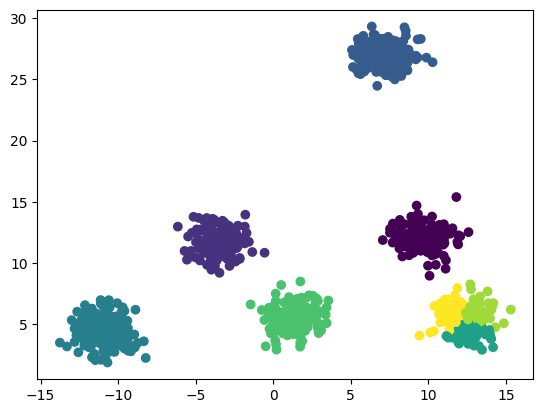

In [4]:
# 🔶 Fit a K-Means model
k_means = KMeans(random_state=42)
k_means.fit(toy_work)

# 🔶 Plot the results
plt.scatter(toy_work[:, 0], toy_work[:, 1], c=k_means.labels_)
plt.show()


1.3 Adapt the hyperparameters <span style="color:#4ea373">[0.5pt]</span>

Choosing the number of n_clusters without extra information is not trivial. For these blobs data, we don't have any labels. Which configurations do you think are be the best for this dataset? How many n_custers would you choose?

Plot your results.

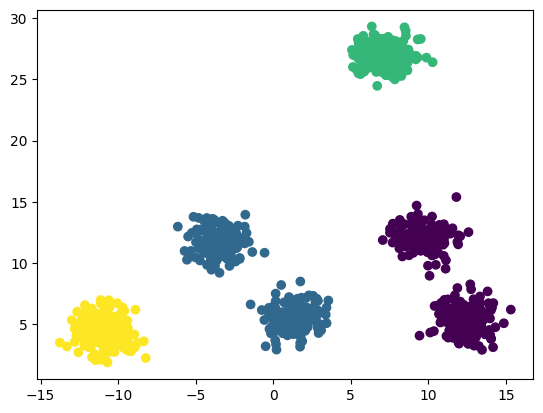

In [6]:
# 🔶 Fit a K-Means model and plot the result
k_means = KMeans(random_state=42, n_clusters=4)
k_means.fit(toy_work)

# 🔶 Plot the results
plt.scatter(toy_work[:, 0], toy_work[:, 1], c=k_means.labels_)
plt.show()

1.4. Apply KMeans to cluster the Spiral dataset. <span style="color:#4ea373">[0.5pt]</span>

In [7]:
# 🔶 Load the spiral data and fit K-Means
#spiral = np.load('/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/spiral.npz') #home
spiral = np.load('/Users/merterol/Desktop/VSCode/uzh/Computational Science/Sem 4/PHY371/data/spiral.npz') #work

spiral.files

x_cords = spiral["x"]
y_cords = spiral["y"]

print(x_cords.shape)
print(y_cords.shape)


(312, 2)
(312,)


      x1     x2  label
0  1.720  1.195    2.0
1  1.160  1.525    1.0
2  0.865  1.930    3.0
3  2.320  3.045    1.0
4  3.125  2.130    1.0


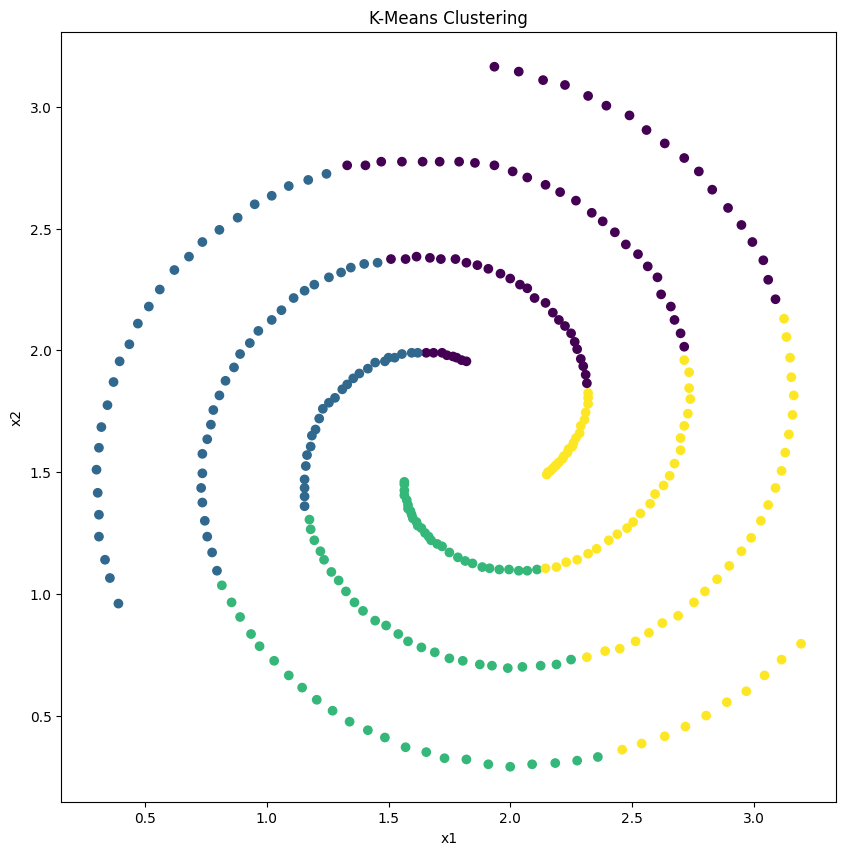

In [8]:
df_spiral = pd.DataFrame({
    "x1": x_cords[:, 0],
    "x2": x_cords[:, 1],
    "label": y_cords
})

print(df_spiral.head())

kmeans_spiral = KMeans(n_clusters=4, random_state=42)
kmeans_spiral.fit(df_spiral[["x1", "x2"]])
plt.figure(figsize=(10, 10))
plt.scatter(df_spiral["x1"], df_spiral["x2"], c=kmeans_spiral.labels_)
plt.title("K-Means Clustering")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


Which conclusions can be drawn from the output? Comment on 

- required assumptions for applying K-Means
- limitations of K-Means

Can you find a K-Means solution for this dataset? Write down your ideas here.

&#x1F536; **Your Answer**:

#### 2. Mean Shift <span style="color:#4ea373">[3pt]</span>

Now, explore the mean shift algorithm for the same datasets. 

2.1. Apply the Mean Shift algorithm to both datasets (points and spiral) and plot the results next to each other. Choose suitable hyperparamters. <span style="color:#4ea373">[1pt]</span>


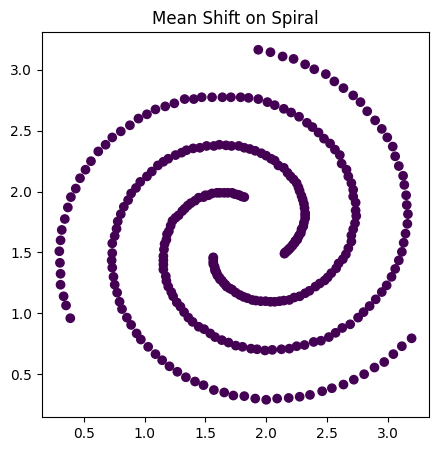

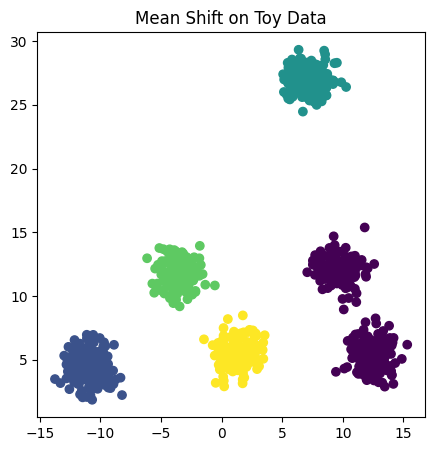

In [9]:
# 🔶 Cluster both sets and plot the results
from sklearn.cluster import MeanShift, estimate_bandwidth

X_spiral = df_spiral[['x1', 'x2']].values
X_toy = toy_work[['x1', 'x2']].values if isinstance(toy_work, pd.DataFrame) else toy_work


bandwidth_spiral = estimate_bandwidth(X_spiral, quantile=0.2, n_samples=100)
bandwidth_toy = estimate_bandwidth(X_toy, quantile=0.2, n_samples=100)

ms_spiral = MeanShift(bandwidth=bandwidth_spiral)
ms_toy = MeanShift(bandwidth=bandwidth_toy)

ms_spiral.fit(X_spiral)
ms_toy.fit(X_toy)

labels_spiral = ms_spiral.labels_
labels_toy = ms_toy.labels_

plt.figure(figsize=(5, 5))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=labels_spiral)
plt.title("Mean Shift on Spiral")

plt.figure(figsize=(5, 5))
plt.scatter(X_toy[:, 0], X_toy[:, 1], c=labels_toy)
plt.title("Mean Shift on Toy Data")

plt.show()

Again, elaborate on the assumptions required for a successful application of the Mean Shift algorithm. 

&#x1F536; **Your Answer**:

2.2 Find a solution for clustering the spiral dataset <span style="color:#4ea373">[2pt]</span>

Everything is allowed here (as long as you don't give the algorithm the solution). Keep your unsuccsessful ideas as well and try to keep your code as clean as possible.

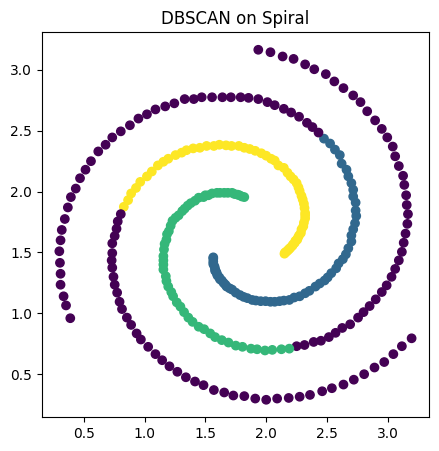

In [10]:
# 🔶 Cluster the spiral dataset successfully and plot the result.
# k-means fails as seen earlier

#dbscan
from sklearn.cluster import DBSCAN
scan = DBSCAN(eps=0.3, min_samples=10)
scan.fit(X_spiral)
plt.figure(figsize=(5, 5))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=scan.labels_)
plt.title("DBSCAN on Spiral")
plt.show()


#### 3. Evaluating the Performance of Clustering Algorithms for a Classification Task <span style="color:#4ea373">**[3pt]**</span>

We want to explore how well clustering algorithms perform on a classification task. We will pretend that we do not have access to the labels for training the models and later use them for model evaluation.

In [11]:
# Load data
#df_iris=pd.read_csv('/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']) # 🔶 Add correct path
df_iris=pd.read_csv('/Users/merterol/Desktop/VSCode/uzh/Computational Science/Sem 4/PHY371/data/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']) # 🔶 Add correct path

# Split data into training and test sets
iris_test = df_iris.sample(frac = 0.2, random_state=42) 
iris_train = df_iris.drop(iris_test.index)

3.1. Explore the Dataset <span style="color:#4ea373">[0.5pt]</span>

For each of the features, plot the value distribution as a histogram. Use a 2x2 grid for plotting 


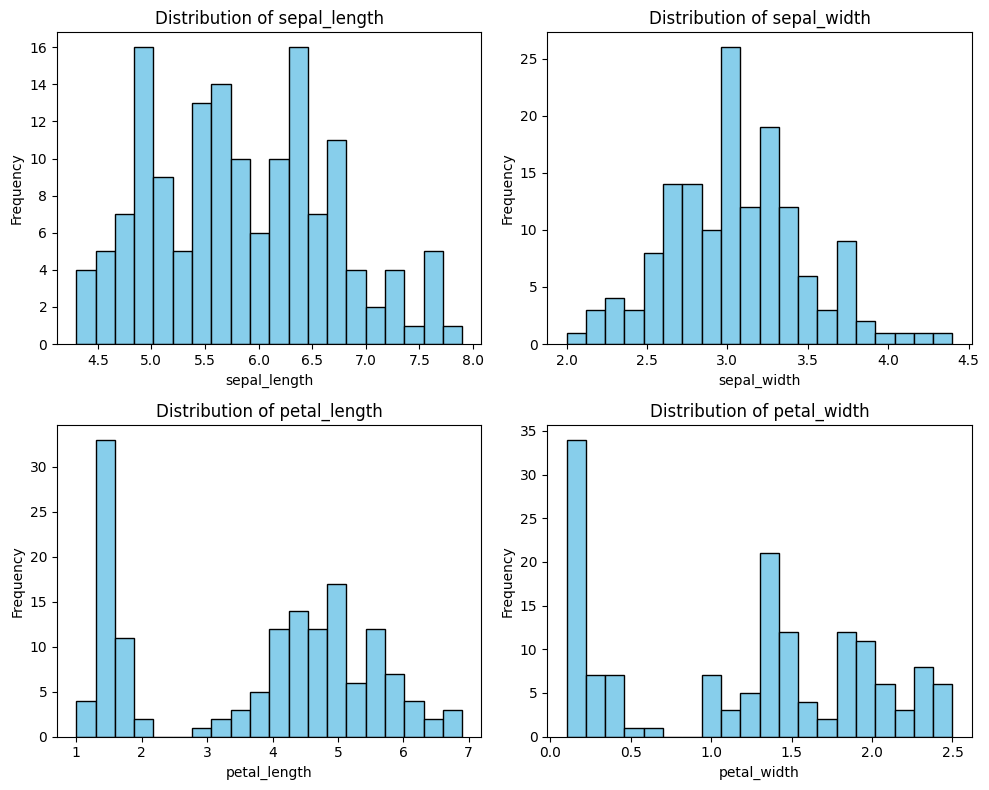

In [12]:
# 🔶 Plot feature distribution
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    ax.hist(df_iris[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


3.2. Fit K-Means <span style="color:#4ea373">[1pt]</span>

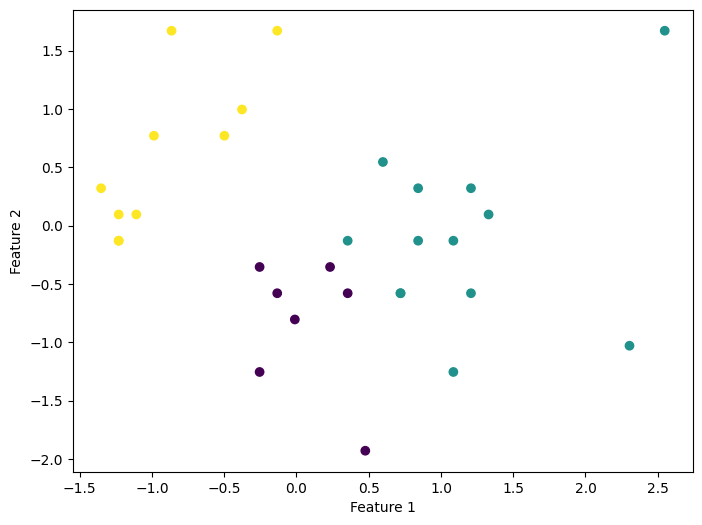

In [17]:
from sklearn.model_selection import train_test_split

# 🔶 use the features 'sepal_length', 'sepal_width', 'petal_length' for training
X = df_iris[['sepal_length', 'sepal_width', 'petal_length']]
y = df_iris['species']

# 🔶 normalize the data correctly
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

# 🔶 fit K - Means and predict the clusters for the hold out set.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
holdout_predictions = kmeans.predict(X_holdout_scaled)

# 🔶 Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout_scaled[:, 0], X_holdout_scaled[:, 1], c=holdout_predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

What is the best number of clusters for this dataset?


&#x1F536; **Your Answer**:

3.3 Lets investigate the resulting clusters by looking at the true labels. <span style="color:#4ea373">[1pt]</span>

For each cluster, make a barplot indicating how many samples for each species ended up in this cluster. Always plot all three species even if they are zero.

In [ ]:
# 🔶 Plot



We also want to know how the clusters are distributed in the feature space. Make a 3D plot with the three features we picked on each of the axis and the cluster number as the color.

In [ ]:
# 🔶 Define the 3D visualizing function and plot the result for our model


Comment on the two plots. Do you think the clustering algorithm did a good job in separating the classes?

&#x1F536; **Your Answer**:

3.4 Repeat the procedure for the Mean Shift Algorithm <span style="color:#4ea373">[0.5pt]</span>

In [ ]:
# 🔶 Fit the data


In [ ]:
# 🔶 Barplot


Which outcome do you prefer? How did you pick the bandwidth for the Mean Shift algorithm?

&#x1F536; **Your Answer**:

#### 4. Metric Based Evaluation <span style="color:#4ea373">**[3pt]**</span>


We now implement metrics which can help measure the performance of the algorithms. We will evaluate the performance on the remaining 50 samples.

4.1. Prepare the data splits and fit the models <span style="color:#4ea373">[1pt]</span>

In [ ]:
# 🔶 Adapt the sets. We want to use all features now. Don't forget to rescale the data.



In [ ]:
# 🔶 Fit K-means and Mean-Shift
y_kmeans_train = ...
y_kmeans_test = ...

y_meanshift_train = ...
y_meanshift_test = ...



4.2. Implement functions to find the majority label, the label coverage and the purity of the clusters. <span style="color:#4ea373">[2pt]</span>

In [ ]:

# 🔶 Return the majority label
def calculate_majority_label(cluster:pd.Series)-> str: 

    pass

# 🔶 Calculate and return which percentage of the samples with the majority label is covered by this cluster 
def coverage(cluster:pd.Series, dataset:pd.Series)-> float: 
    
    pass

# 🔶 Calculate and return the percentage of the majority class within the cluster
def purity(cluster:pd.Series)-> float:
   
    pass



In [ ]:
# DO NOT CHANGE
print('KMEANS')
print()

clusters = np.unique(y_kmeans_train)
for i in clusters:
    print('Cluster: ', i)
    cluster = iris_test['species'][y_kmeans_test==i]
    print(f'Majority label:  {calculate_majority_label(cluster)},')
    print(f'Coverage: {coverage(cluster, iris_test["species"])*100}% ')
    print(f'Purity:{purity(cluster)*100}%')
    print()

print('MEAN SHIFT')
print()
clusters = np.unique(y_meanshift_train)
for i in clusters:
    print('Cluster: ', i)
    cluster = iris_test['species'][y_meanshift_test==i]
    print(f'Majority label:  {calculate_majority_label(cluster)},')
    print(f'Coverage: {coverage(cluster, iris_test["species"])*100}% ')
    print(f'Purity:{purity(cluster)*100}%')
    print()

Elaborate on the results:

- Did the metric confirm your intuition? 
- Why are metrics useful?
- Can they be missleading as well?
- When does the purity get less reliable? 
- When does the coverage get less reliable?

Hint: Does the size of the clusters effect the metrics?

&#x1F536; **Your Answer**:

#### 5. Implementing Mean Shift <span style="color:#4ea373">[3pt]</span>

Let's implement mean-shift algorithm ourselves.

Complete the function ml_meanshift that performs the mean shift algorithm. The function takes 3 arguments:

- input data: sample points in a N-by-2 matrix (number of rows is the number of samples, dimensionality of the input data will always be 2 for this exercise)
- the kernel bandwidth $h$
- the stopping threshold $\vartheta$

It should return two values:

- cluster indexes: a column vector with N rows, specifying the cluster index for each sample
- cluster modes: a M-by-2 matrix, returning the cluster modes (the points with the highest density) for each cluster (where M is the number of clusters)

For this task, use the Epanechnikov kernel. Luckily all terms before the sum cancel out in the mean shift formula, leading to

$$
\mathbf{q}_{t+1} = \frac{
\sum_{i=1}^N \mathbf{x}_i
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}i|^2}{h^2} \right)
} {
\sum_{i=1}^N
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}_i|^2}{h^2} \right)
}
$$

Start the mean shift procedure at each point and iterate until $|\mathbf{q}_{t}-\mathbf{q}_{t-1}| < \vartheta$ where $\vartheta$ is the threshold passed to the function. Additionally also count the iterations and add it as condtion so the loop does not run infinitely. You can use $200$ as the maximum value of iteration.

When the iteration stopped, decide if a cluster mode already exists that is closer than $\frac{h}{5}$. If yes, assign the point that you started at to this cluster. Otherwise, create a new cluster and assign the point to the new cluster.

In [ ]:
def ml_meanshift(data,h,theta):

    # 🔶 initialize modes
    modes = ...
    # 🔶 initialize index variable for data points
    index = ...
    # 🔶  s = num samples
    s = ...

    for i in range(s):

        # 🔶 initialize query points 0 and 1
        q1 = ...
        q0 = ...

        # 🔶 initialize early stopping condition
        it = ...

        # 🔶 while the distance between the query points is greater than theta and the number of iterations is less than 200
        while ... :
            
            
            # 🔶 update q0
            q0 = ...    
            # 🔶 compute q_t+1. Do not use any loops here
            q1 = ...

            # 🔶 update iteration
            it = ...

        # check for clusters in the vicinity

        # 🔶 if there are modes, check if the query point is close to any of them
        
        # 🔶 if there are modes and the query point is close to any of them, assign the index of the closest mode to the index variable
        
        # 🔶 if there are no modes or the query point is not close to any of them, add the query point to the modes
        
           

    return index, modes

In [ ]:
def visualise_kmeans(data,idx,centers,updated=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[:,0],data[:,1],marker='.', c=idx)
    ax.plot(centers[:,0],centers[:,1],'+',color='r',markersize=15,mew=2)
    plt.show()
    
def test_meanshift():
    data = np.genfromtxt("", delimiter=',') # 🔶 Add the correct path
    idx, centers = ml_meanshift(data,4,0.001)
    
    centers_2 = np.array(centers)
    
    visualise_kmeans(data=data,idx=idx,centers=centers_2)

In [ ]:
# test and visualise your results
test_meanshift()

#### 6. Data Bias <span style="color:#4ea373">[6pt]</span>

With the increased use of AI in the public sphere, problems resulting from data biases gain in influence. Therefore, it is immensely important to be aware of different types of biases, their impact on model outcomes and potential mitigation strategies. Please do a little research excursion and use your findings to answer the following questions. Report your sources!

1. What types of data biases are reported in the literature.

2. How does each of the biases impact the integration of AI in our daily lives? Which ethical concerns come to your mind?

3. Which biases are especially pronounced in your field of expertise? How do they shape the research?

4. Explore two mitigation strategies on the model side. 



&#x1F536; **Your Answer**: